In [1]:
import sys
import os
import pandas as pd
import util_categorize

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_to_test = df.copy()

categorizing age feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1434
           1       0.80      0.88      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809

Node Labels:
 Annotation(0.667381, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


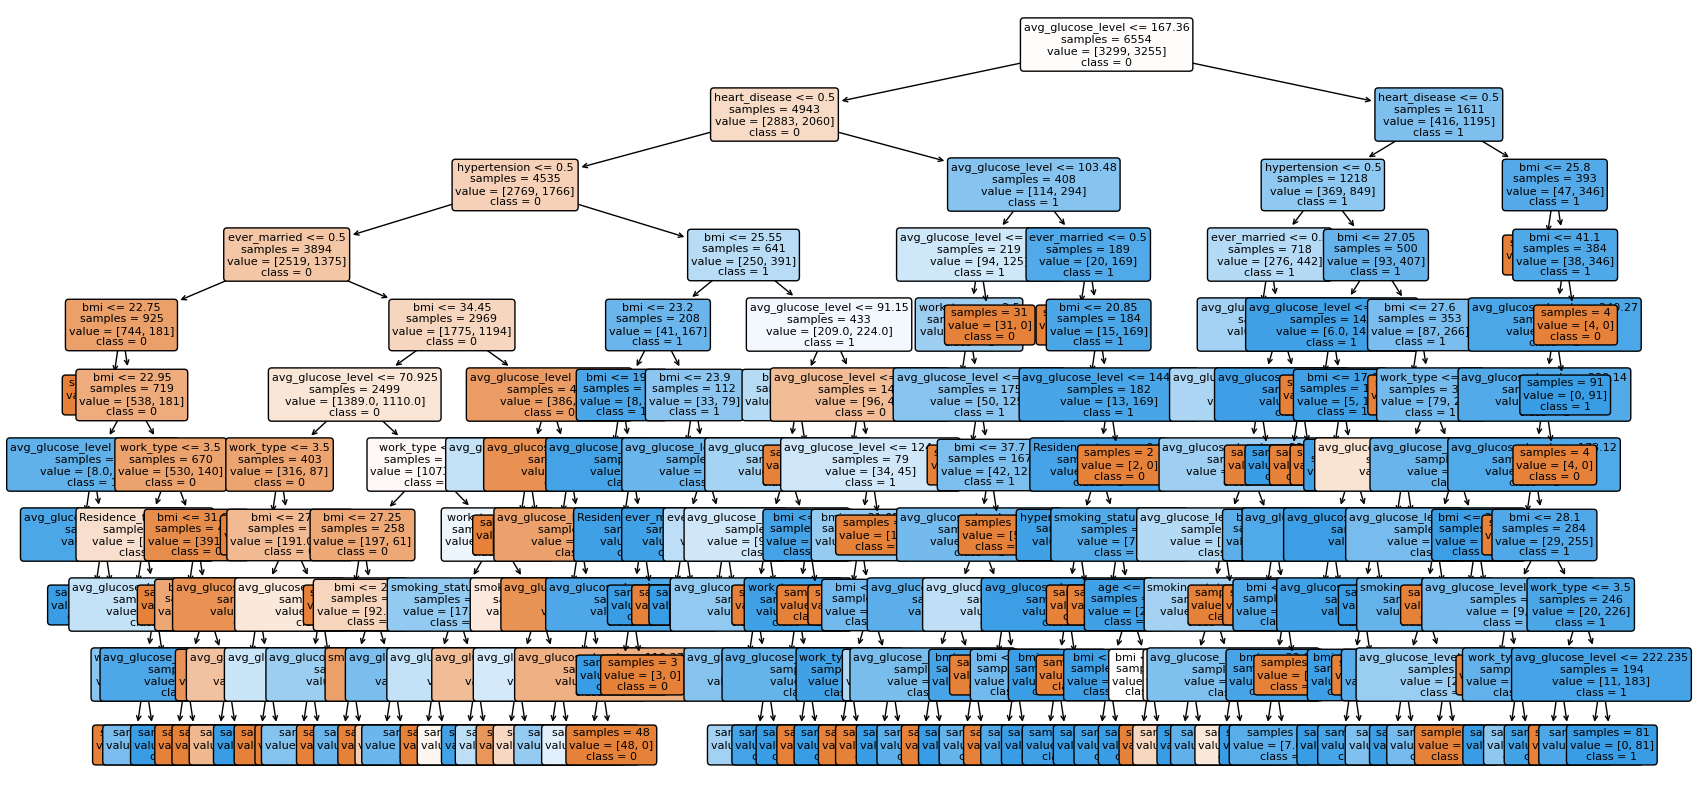

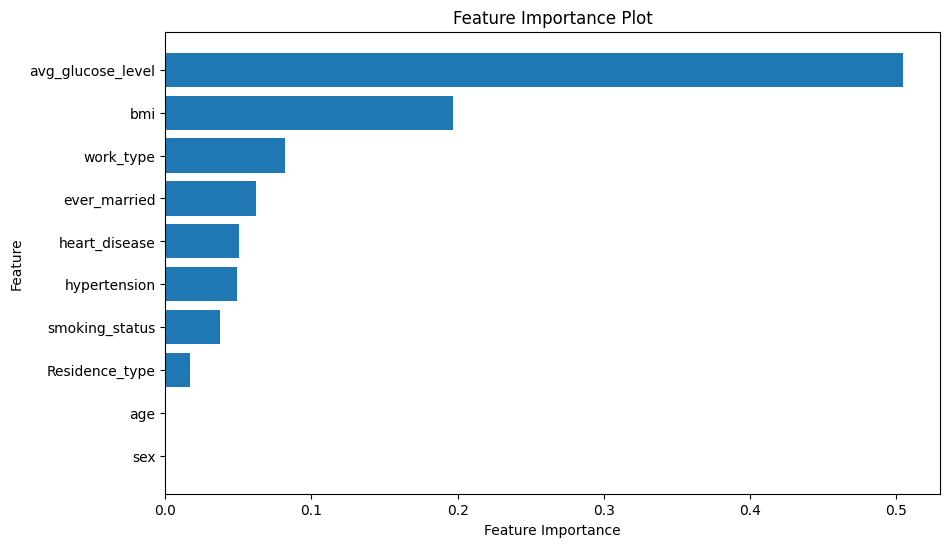

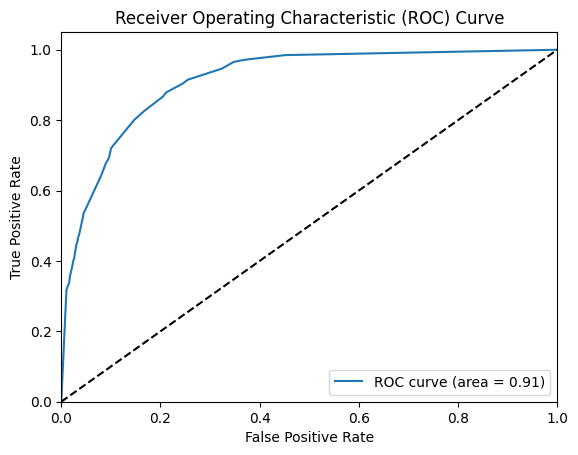

AUC Score: 0.911638392291112


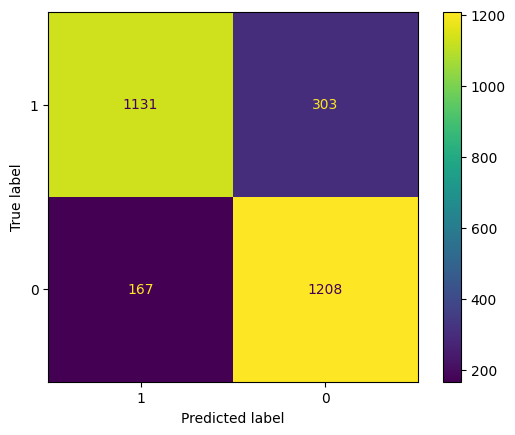

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.8434163701067615, 0.8825622775800712, 0.7864768683274022, 0.8576512455516014, 0.7829181494661922, 0.8291814946619217, 0.7829181494661922, 0.8327402135231317, 0.8607142857142858]
Mean accuracy: 0.8259290798169803
95% confidence interval: (0.8001600394285272, 0.8516981202054333)


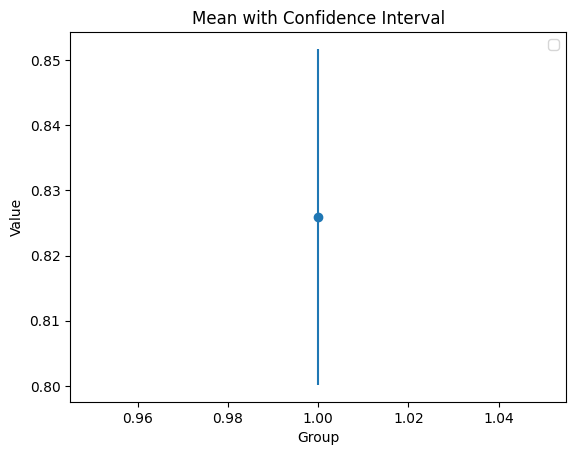


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1434
           1       0.67      0.70      0.68      1375

    accuracy                           0.68      2809
   macro avg       0.68      0.68      0.68      2809
weighted avg       0.68      0.68      0.68      2809



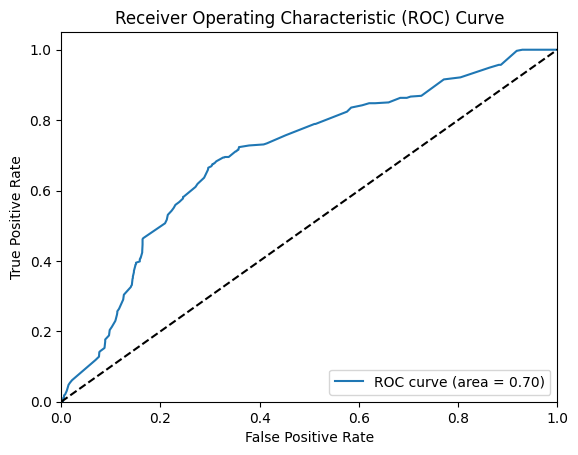

AUC Score: 0.7014352732344364


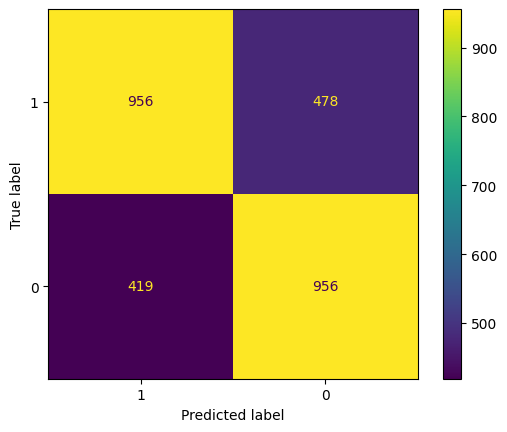

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6619217081850534, 0.6832740213523132, 0.6868327402135231, 0.7259786476868327, 0.7046263345195729, 0.6654804270462633, 0.6725978647686833, 0.7153024911032029, 0.7046263345195729, 0.675]
Mean accuracy: 0.6895640569395018
95% confidence interval: (0.6738671880429756, 0.7052609258360281)


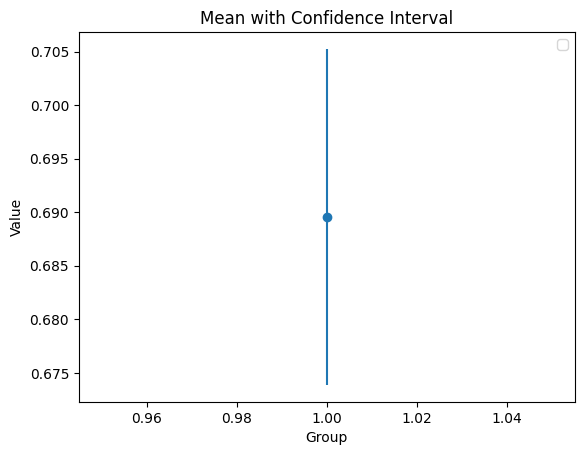

In [2]:
original_continuous_column = df['age'].copy()
df = util_categorize.categorize_age(df)
df = util_categorize.label_encoding(df,'age')
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_age, confidence_interval_dt_ag = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_age_svm, y_test_age_svm, svm  = util_categorize.model_svm(df, df_to_test)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['age'] = original_continuous_column

Categorizing bmi feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1434
           1       0.80      0.77      0.78      1375

    accuracy                           0.79      2809
   macro avg       0.79      0.79      0.79      2809
weighted avg       0.79      0.79      0.79      2809

Node Labels:
 Annotation(0.701488, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


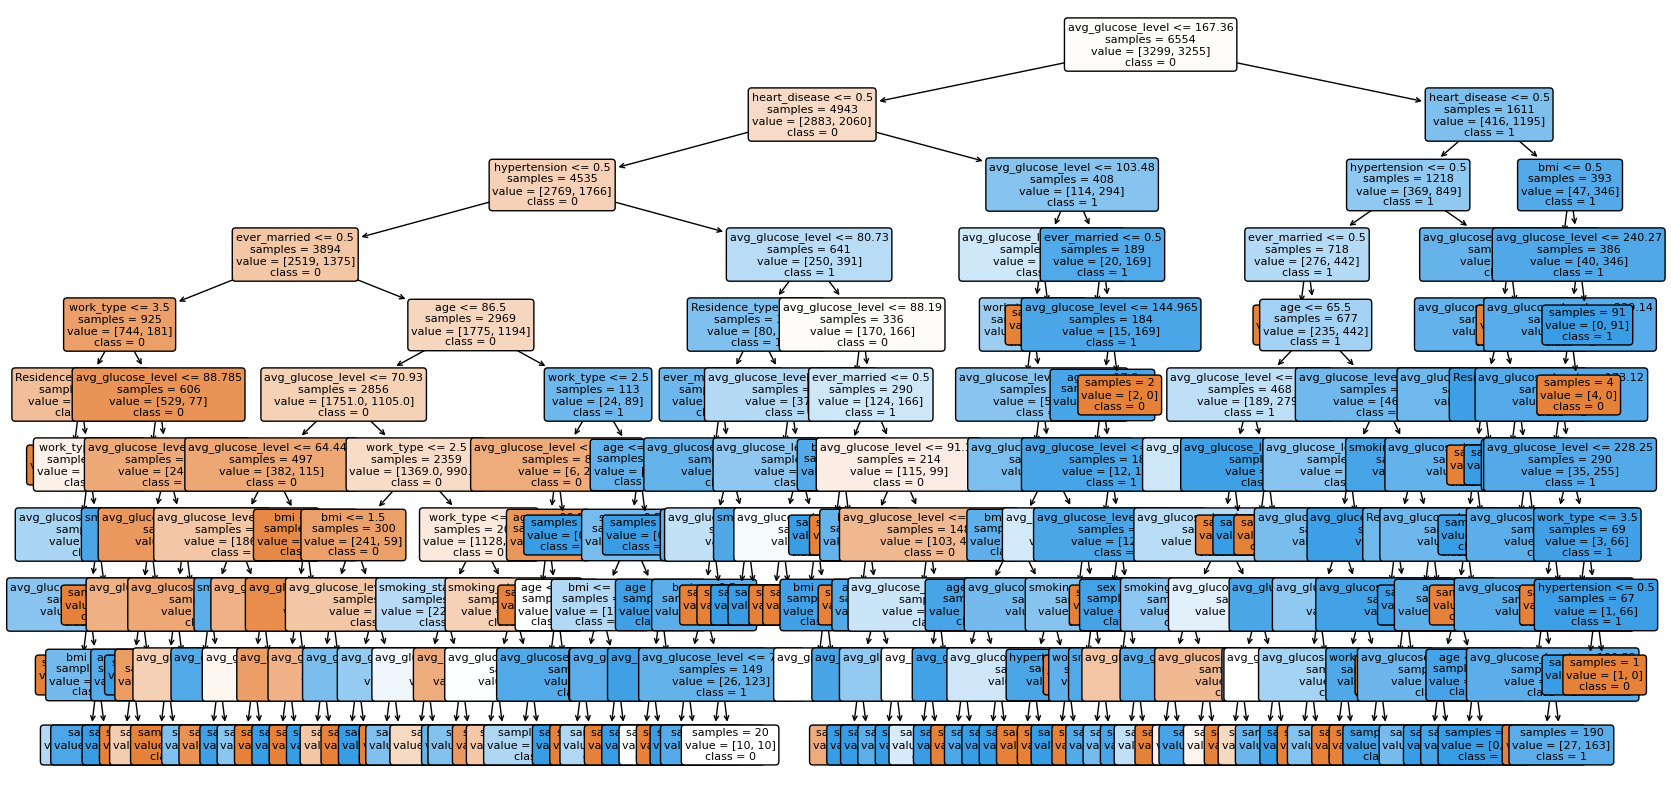

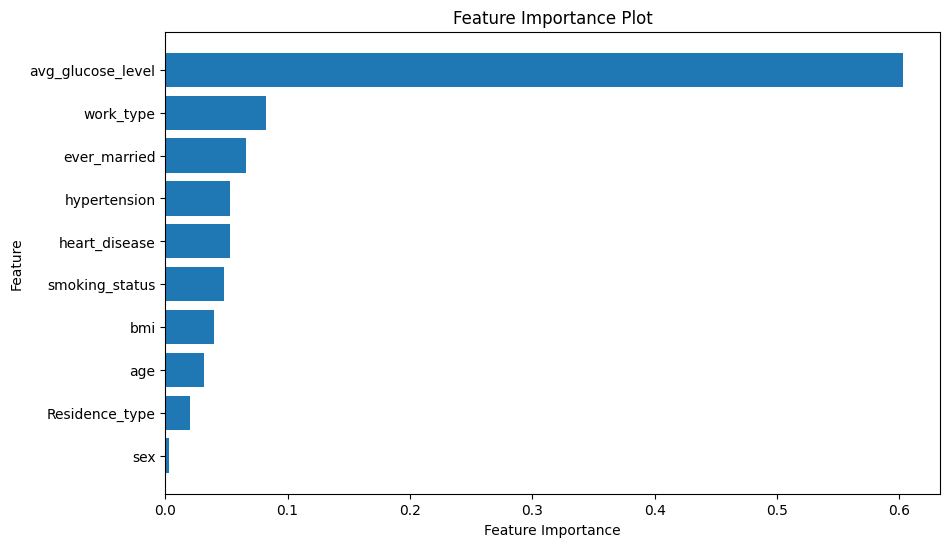

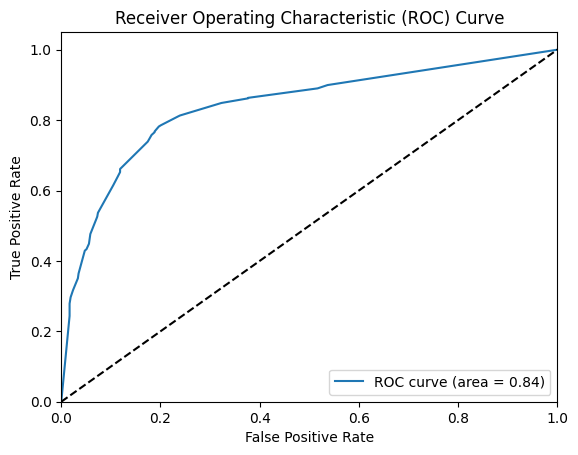

AUC Score: 0.8382895904653227


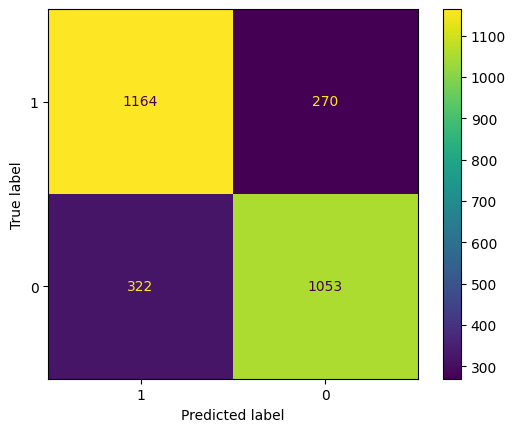

Accuracy for each fold: [0.8291814946619217, 0.7686832740213523, 0.800711743772242, 0.8469750889679716, 0.8434163701067615, 0.8256227758007118, 0.8505338078291815, 0.8540925266903915, 0.8078291814946619, 0.8071428571428572]
Mean accuracy: 0.8234189120488054
95% confidence interval: (0.8039175083684138, 0.8429203157291969)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


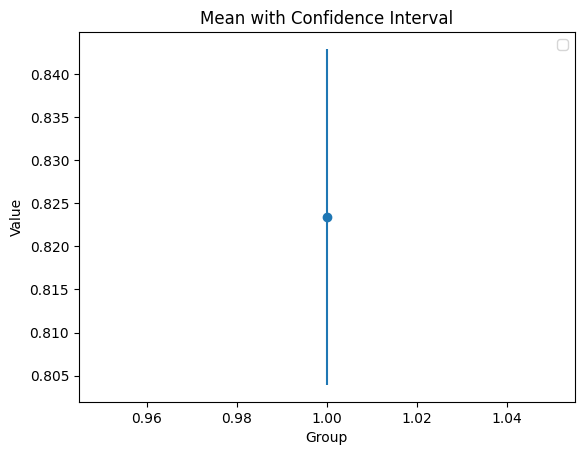


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1434
           1       0.67      0.70      0.68      1375

    accuracy                           0.68      2809
   macro avg       0.68      0.68      0.68      2809
weighted avg       0.68      0.68      0.68      2809



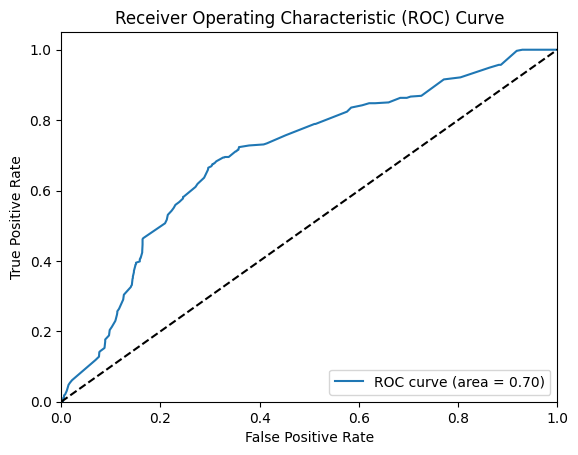

AUC Score: 0.7014352732344364


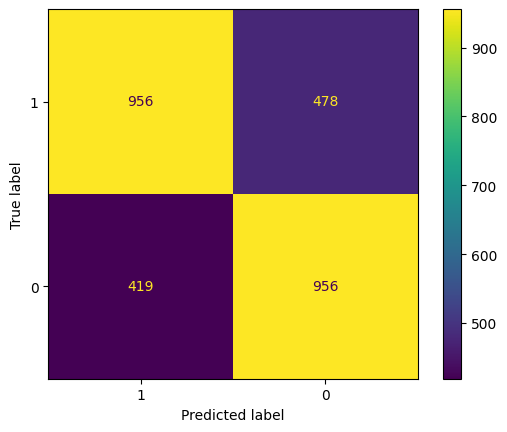

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7366548042704626, 0.7046263345195729, 0.6868327402135231, 0.7153024911032029, 0.6868327402135231, 0.6654804270462633, 0.6797153024911032, 0.6903914590747331, 0.6761565836298933, 0.6964285714285714]
Mean accuracy: 0.693842145399085
95% confidence interval: (0.6790593274021689, 0.708624963396001)


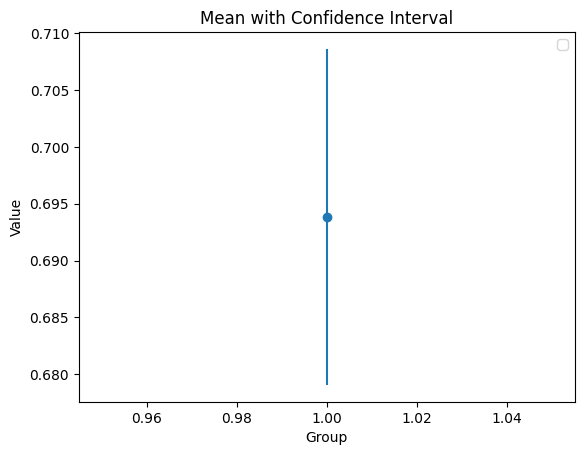

In [3]:
original_continuous_column = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = util_categorize.model_svm(df, df_to_test)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['bmi'] = original_continuous_column

categorizing avg glucose level feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1434
           1       0.64      0.58      0.61      1375

    accuracy                           0.64      2809
   macro avg       0.64      0.64      0.63      2809
weighted avg       0.64      0.64      0.64      2809

Node Labels:
 Annotation(0.513129, 0.954545, 'avg_glucose_level <= 0.5\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


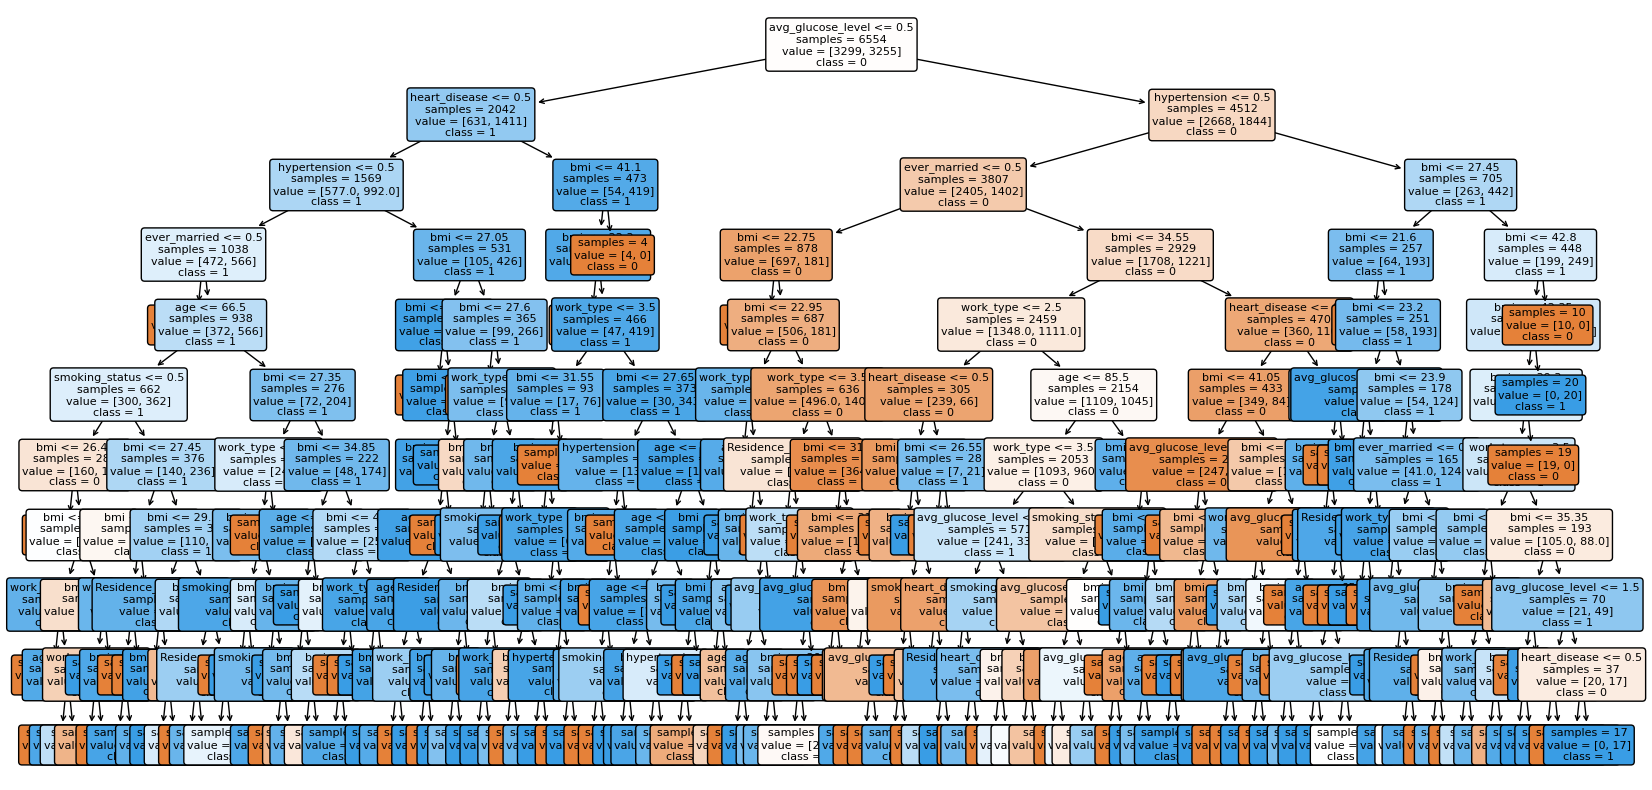

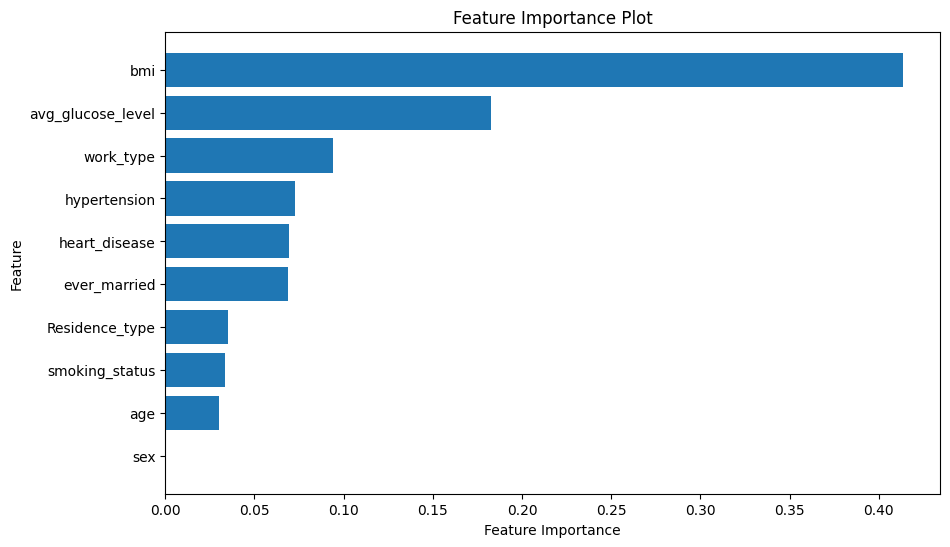

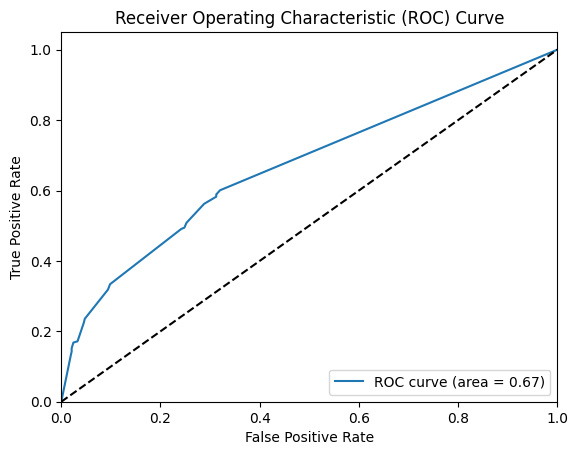

AUC Score: 0.6669347026752885


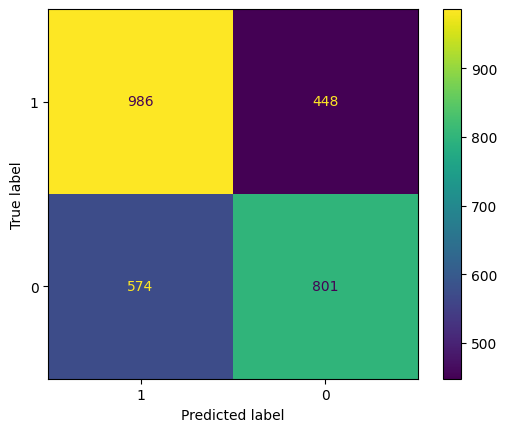

Accuracy for each fold: [0.8220640569395018, 0.8185053380782918, 0.8149466192170819, 0.7829181494661922, 0.8362989323843416, 0.8327402135231317, 0.8647686832740213, 0.8149466192170819, 0.8078291814946619, 0.8]
Mean accuracy: 0.8195017793594307
95% confidence interval: (0.8036658154515965, 0.8353377432672648)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


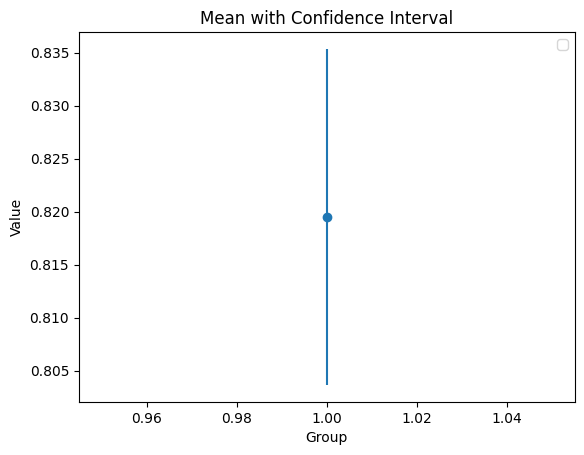


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1434
           1       0.67      0.70      0.68      1375

    accuracy                           0.68      2809
   macro avg       0.68      0.68      0.68      2809
weighted avg       0.68      0.68      0.68      2809



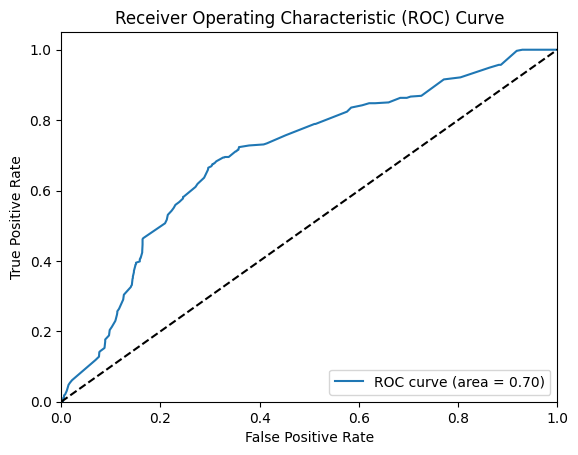

AUC Score: 0.7014352732344364


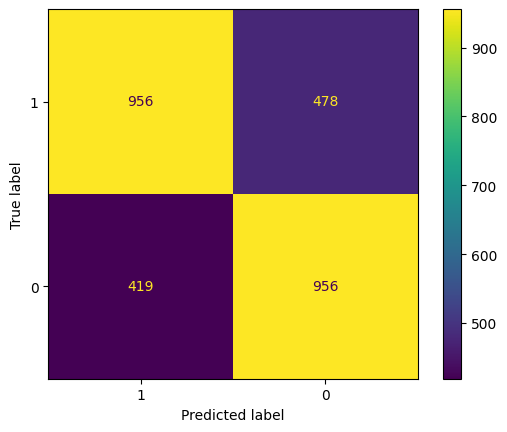

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6903914590747331, 0.6690391459074733, 0.7046263345195729, 0.7224199288256228, 0.7188612099644128, 0.6512455516014235, 0.7224199288256228, 0.6832740213523132, 0.6548042704626335, 0.7107142857142857]
Mean accuracy: 0.6927796136248093
95% confidence interval: (0.6732233003977565, 0.7123359268518622)


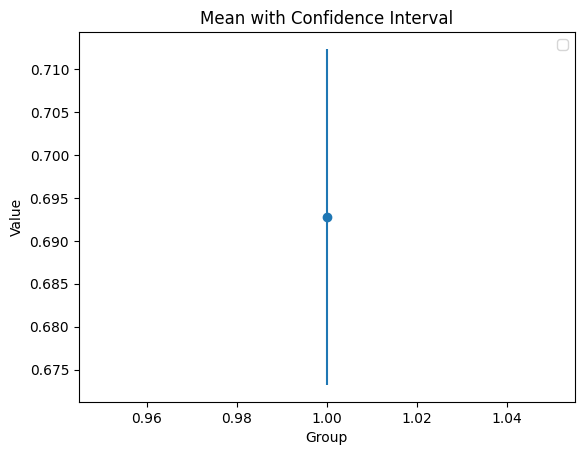

In [4]:
original_continuous_column = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = util_categorize.model_svm(df, df_to_test)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['avg_glucose_level'] = original_continuous_column

categorizing bmi, age and avg_glucose_level features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.55      0.70      0.61      1434
           1       0.56      0.39      0.46      1375

    accuracy                           0.55      2809
   macro avg       0.55      0.55      0.54      2809
weighted avg       0.55      0.55      0.54      2809

Node Labels:
 Annotation(0.504847, 0.954545, 'avg_glucose_level <= 0.5\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


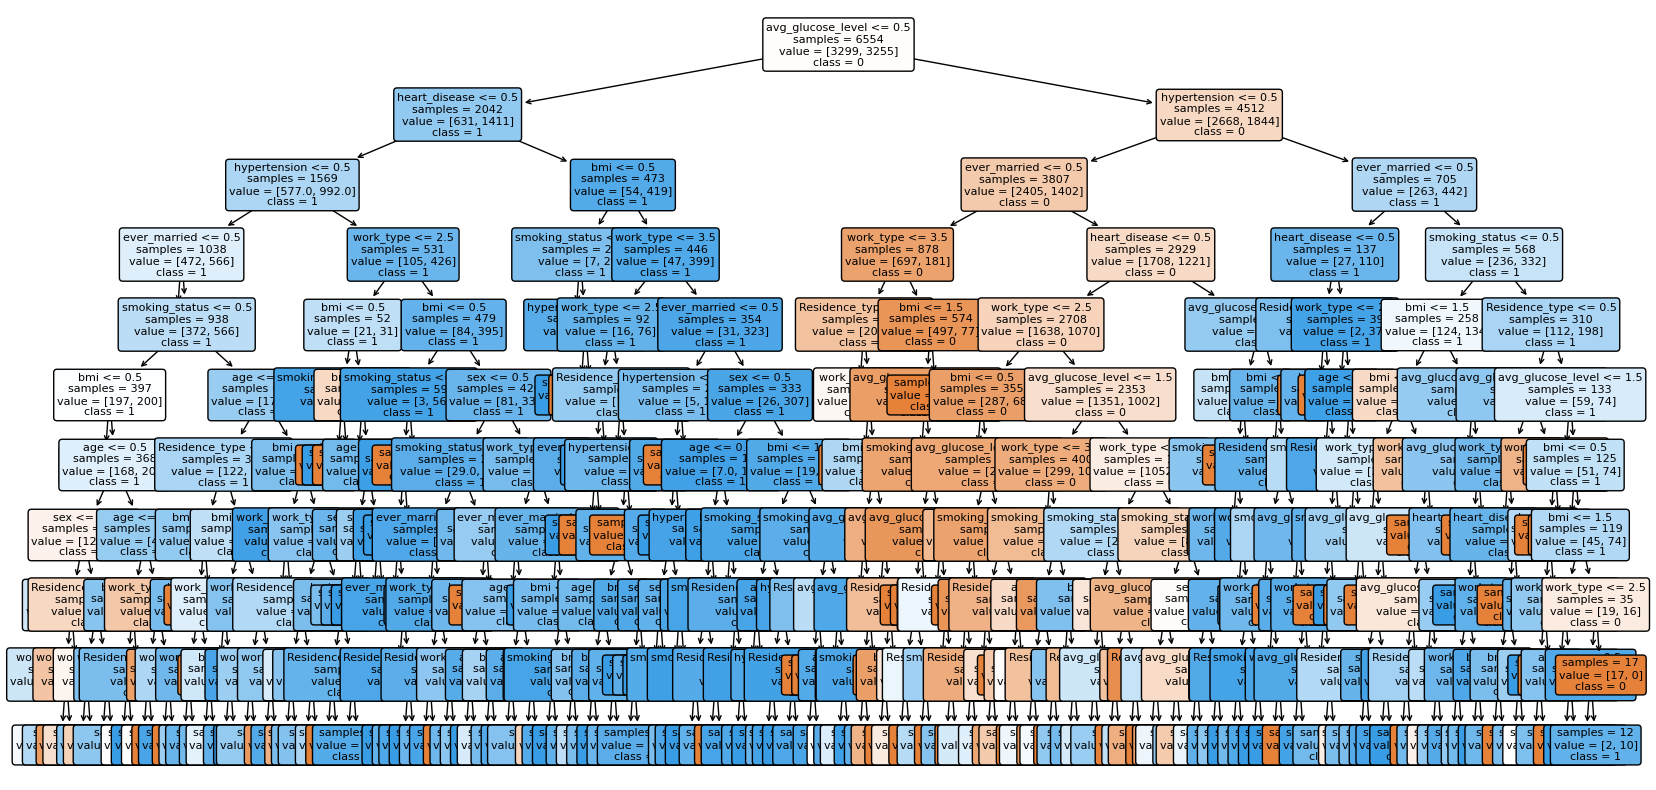

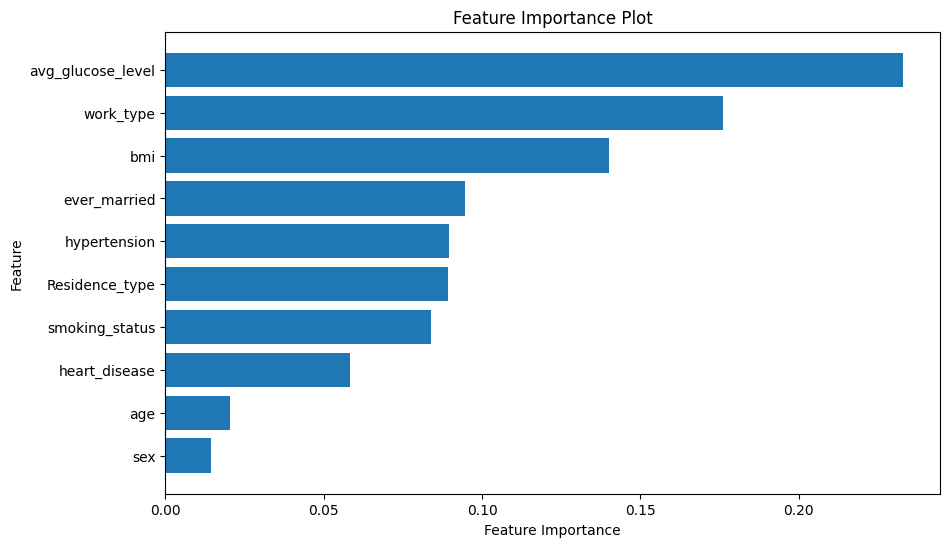

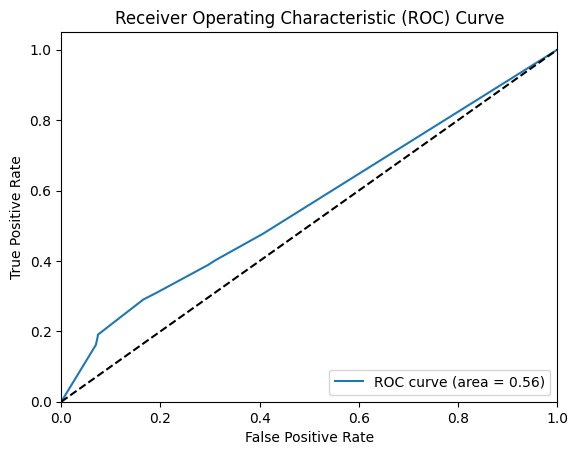

AUC Score: 0.5588583745403828


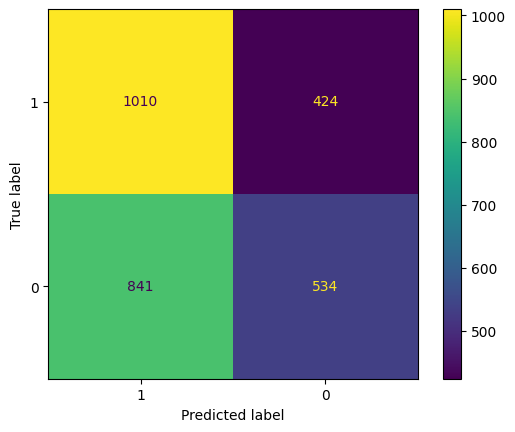

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8505338078291815, 0.8078291814946619, 0.797153024911032, 0.7935943060498221, 0.8505338078291815, 0.8078291814946619, 0.8291814946619217, 0.8505338078291815, 0.797153024911032, 0.8535714285714285]
Mean accuracy: 0.8237913065582104
95% confidence interval: (0.8054722905484215, 0.8421103225679993)


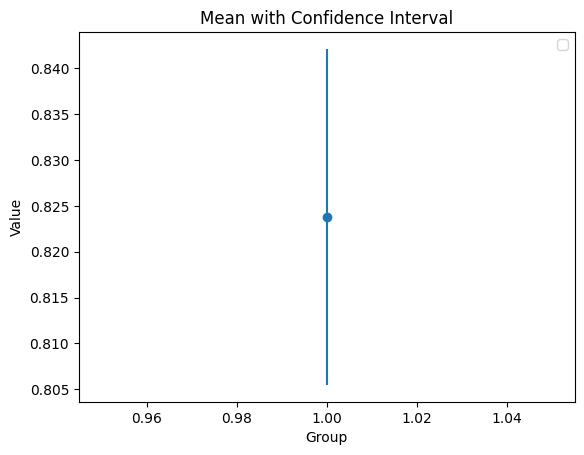


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1434
           1       0.67      0.70      0.68      1375

    accuracy                           0.68      2809
   macro avg       0.68      0.68      0.68      2809
weighted avg       0.68      0.68      0.68      2809



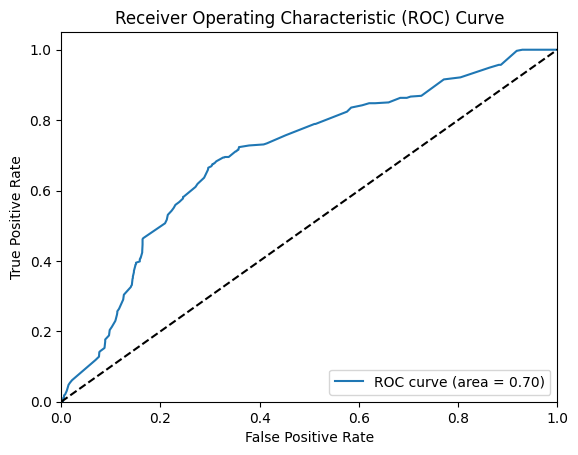

AUC Score: 0.7014352732344364


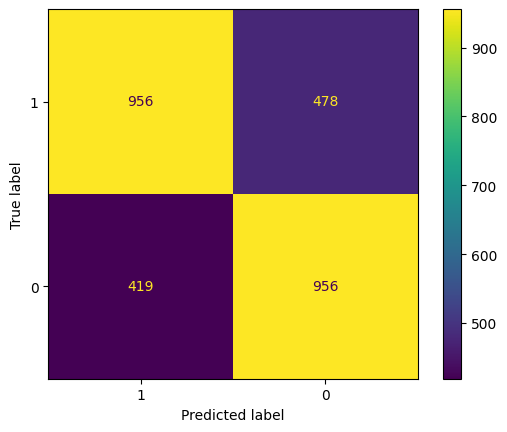

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7295373665480427, 0.701067615658363, 0.7224199288256228, 0.6761565836298933, 0.701067615658363, 0.6725978647686833, 0.7224199288256228, 0.6441281138790036, 0.6797153024911032, 0.7071428571428572]
Mean accuracy: 0.6956253177427555
95% confidence interval: (0.676264802589533, 0.714985832895978)


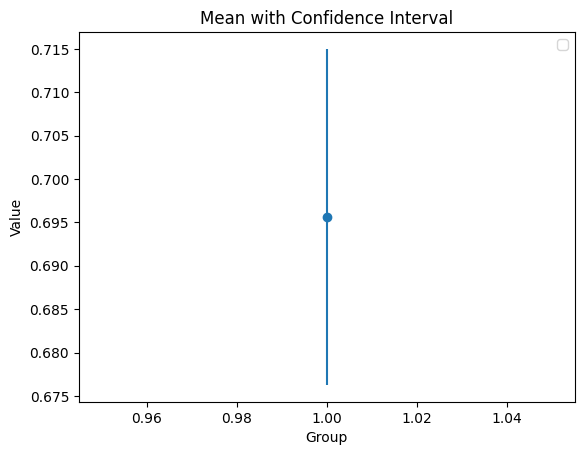

In [5]:
original_continuous_column_glucose = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

original_continuous_column_bmi = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')

original_continuous_column_age = df['age'].copy()
df = util_categorize.categorize_age(df)
df = util_categorize.label_encoding(df,'age')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)

print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, svm = util_categorize.model_svm(df, df_to_test)
mean_accuracy_svm_bmi_glucose, confidence_interval_svm_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['avg_glucose_level'] = original_continuous_column_glucose
df['bmi'] = original_continuous_column_bmi
df['age'] = original_continuous_column_age

## Conclusion

### ROC Curve - Decision Tree

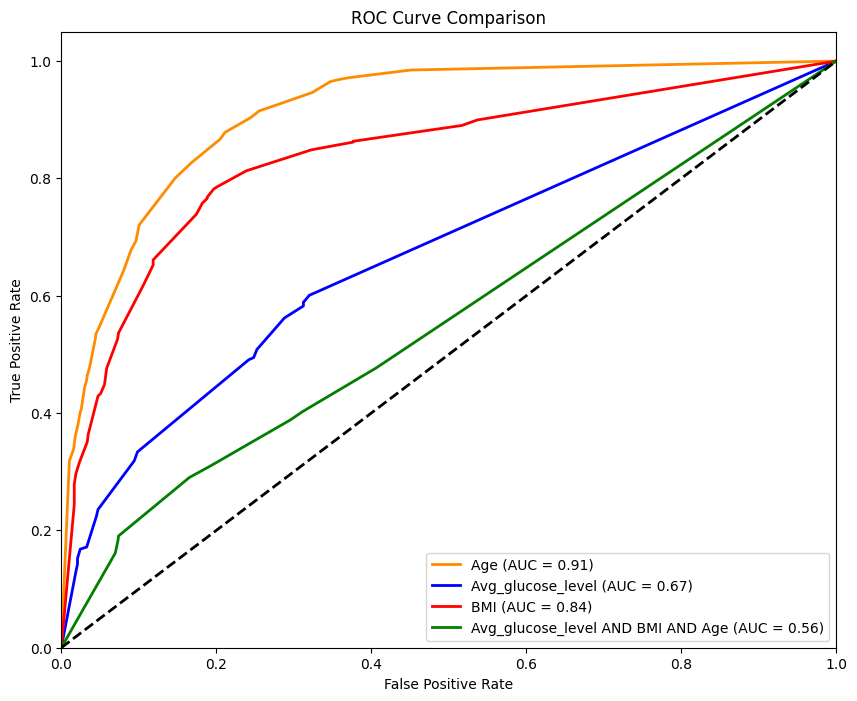

In [6]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, 'Avg_glucose_level AND BMI AND Age')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC Curve - Support Vector Machine

Decision Tree


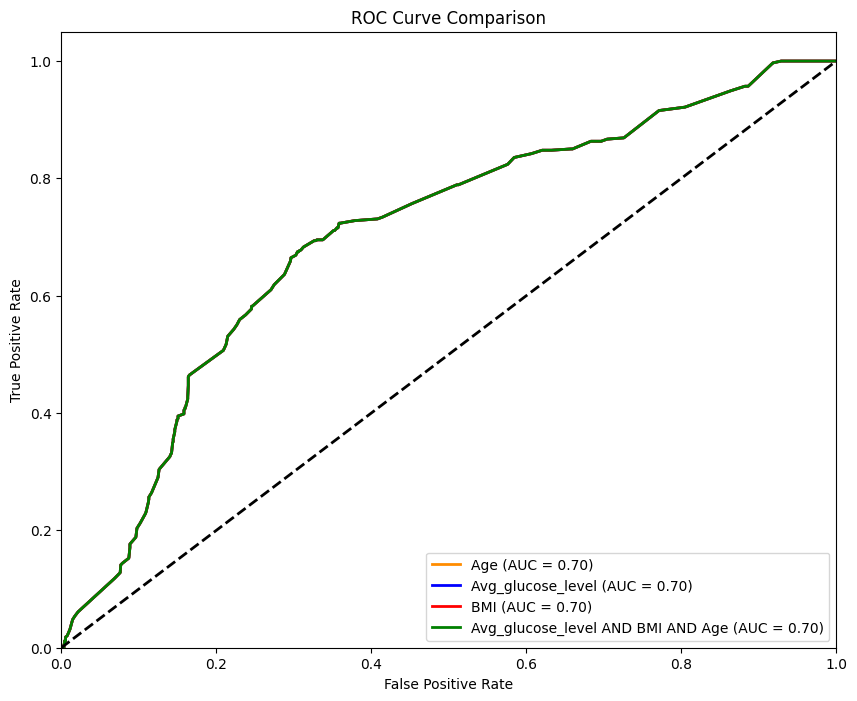

In [7]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, 'Avg_glucose_level AND BMI AND Age')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

Decision Tree


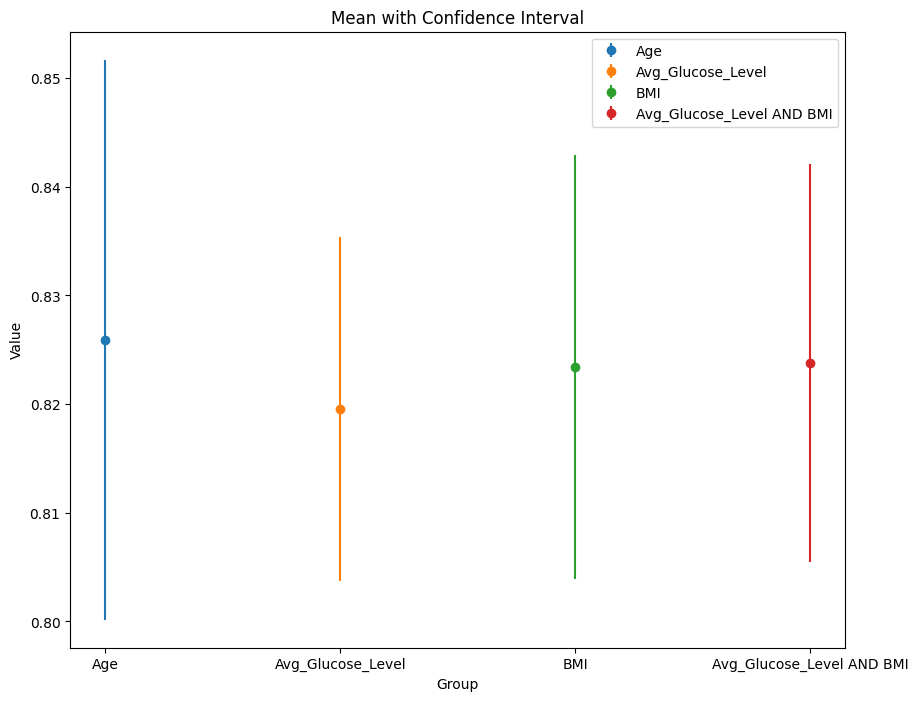

In [8]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_ag),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Avg_Glucose_Level AND BMI', mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose)
]
print('Decision Tree')
ML_algorithms.plot_confidence_intervals(model_results)